In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [7]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="tanh", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(6,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(30,5),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(120,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 12s 214us/sample - loss: 0.1730 - accuracy: 0.9513 - val_loss: 0.0669 - val_accuracy: 0.9846
Epoch 2/5
55000/55000 [==============================] - 11s 202us/sample - loss: 0.0669 - accuracy: 0.9831 - val_loss: 0.0565 - val_accuracy: 0.9862
Epoch 3/5
55000/55000 [==============================] - 11s 203us/sample - loss: 0.0496 - accuracy: 0.9876 - val_loss: 0.0621 - val_accuracy: 0.9862
Epoch 4/5
55000/55000 [==============================] - 11s 204us/sample - loss: 0.0402 - accuracy: 0.9911 - val_loss: 0.0538 - val_accuracy: 0.9876
Epoch 5/5
55000/55000 [==============================] - 11s 203us/sample - loss: 0.0341 - accuracy: 0.9924 - val_loss: 0.0547 - val_accuracy: 0.9878


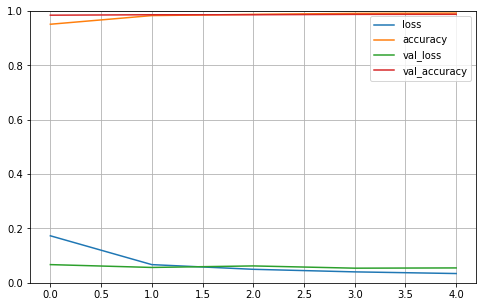

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5442    0    0    0    0    0    2    0    0    0]
 [   0 6169    1    0    1    1    0    6    1    0]
 [   2   16 5433    2    0    0    0   13    4    0]
 [   0    0    2 5627    0    1    0    1    5    2]
 [   0    4    0    0 5293    0    1    1    0    8]
 [   6    0    0   36    0 4940    1    0    3    1]
 [   8    4    1    1   10    6 5380    0    7    0]
 [   1    6    6    1    4    0    0 5692    0    5]
 [   4    3    2    3    0    1    0    5 5367    4]
 [   2    7    0   11   17    1    0    9    5 5402]]


In [12]:
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 1s 84us/sample - loss: 0.0518 - accuracy: 0.9865


[0.05179248241633177, 0.9865]

In [13]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1130    0    2    0    1    1    1    0    0]
 [   3    4 1011    2    1    0    0    7    4    0]
 [   0    0    2 1007    0    1    0    0    0    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   2    0    0   18    0  869    1    1    1    0]
 [   7    2    1    1    5    4  934    0    4    0]
 [   2    4    4    1    1    0    0 1013    1    2]
 [   3    0    3    1    0    1    0    2  960    4]
 [   1    2    0    9    8    0    0    1    2  986]]


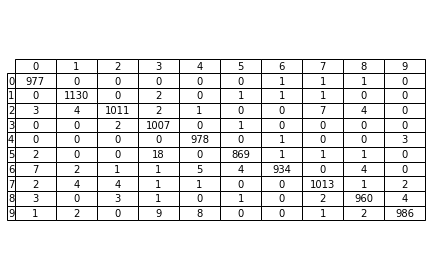

In [14]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat_2.png')